In [1]:
%matplotlib inline
import numpy as np

from scipy.io import loadmat 
import mne, glob 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.manifold import MDS
from sklearn.svm import LinearSVC

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler,
                          cross_val_multiscore, LinearModel, get_coef,
                          Vectorizer, CSP)
from mne import io, pick_types, read_events, Epochs, EvokedArray, create_info
from mne.preprocessing import Xdawn
from mne import combine_evoked
from mne.channels import read_layout


In [2]:
# Load raw data

raw = mne.io.read_raw_brainvision('/Volumes/LaCie/AR_mvpa/MNE/feedback/AR_001_rFB_AR.vhdr', preload=True, verbose=False)
raw2 = mne.io.read_raw_brainvision('/Volumes/LaCie/AR_mvpa/MNE/feedback/AR_009_rFB_AR.vhdr', preload=True, verbose=False)
raw3 = mne.io.read_raw_brainvision('/Volumes/LaCie/AR_mvpa/MNE/feedback/AR_003_rFB_AR.vhdr', preload=True, verbose=False)
raw4 = mne.io.read_raw_brainvision('/Volumes/LaCie/AR_mvpa/MNE/feedback/AR_004_rFB_AR.vhdr', preload=True, verbose=False)

# Set montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, verbose=False)
raw2.set_montage(montage, verbose=False)
raw3.set_montage(montage, verbose=False)
raw4.set_montage(montage, verbose=False)


<RawBrainVision | AR_004_rFB_AR.txt, 13 x 995000 (995.0 s), ~98.7 MB, data loaded>

In [3]:


# Construct epochs

events,event_dict = mne.events_from_annotations(raw, verbose=False)

events2,event_dict2 = mne.events_from_annotations(raw2, verbose=False)


events3,event_dict3 = mne.events_from_annotations(raw3, verbose=False)


events4,event_dict4 = mne.events_from_annotations(raw4, verbose=False)




In [4]:
print(events2)

[[     0      0  99999]
 [  2493      0     15]
 [  2500      0  10005]
 ...
 [997500      0      8]
 [997500      0  10005]
 [997694      0     15]]


In [5]:

# 6 left reward
# 7 right reward
# 8 left noreward
# 9 right noreward

event_id = {'Left Reward': 6, 'Right Reward': 7,'Left Noreward': 8, 'Right Noreward': 9 }  # just use two


###BINARY CLASSIFICATION 

#event_id = {'Left Reward': 6, 'Right Reward': 7,'Left Noreward': 8, 'Right Noreward': 9 }  # just use two

## SUB1

#left right 

eventsLR=mne.event.merge_events(events, [6,8],3, replace_events=True)
eventsLR=mne.event.merge_events(eventsLR, [7,9],4, replace_events=True)


event_idLR = {'Left': 3,'Right': 4}  # just use two


## SUB2

#left right 

eventsLR2=mne.event.merge_events(events2, [6,8],3, replace_events=True)
eventsLR2=mne.event.merge_events(eventsLR2, [7,9],4, replace_events=True)


event_idLR2 = {'Left': 3,'Right': 4}  # just use two


#left right 

eventsLR3=mne.event.merge_events(events3, [6,8],3, replace_events=True)
eventsLR3=mne.event.merge_events(eventsLR3, [7,9],4, replace_events=True)


event_idLR3 = {'Left': 3,'Right': 4}  # just use two


#left right 

eventsLR4=mne.event.merge_events(events4, [6,8],3, replace_events=True)
eventsLR4=mne.event.merge_events(eventsLR4, [7,9],4, replace_events=True)


event_idLR4 = {'Left': 3,'Right': 4}  # just use two




## lEFT vs RIGHT CONDITIONS ##

In [6]:
## CREATE EPOCHS FROM RAW EEG DATA SUB 1-4

#event_id = {'Left Reward': 6, 'Right Reward': 7,'Left Noreward': 8, 'Right Noreward': 9 }  # just use two
# WINDOW tmin=0, tmax=0.5, 100ms AFTER FEEDBACK 
# Setup for reading the raw data

picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')

reject_criteria = dict(eeg=150e-6)      # 150 µV

# Read epochs
epochsLR = mne.Epochs(raw, events=eventsLR, event_id=event_idLR, tmin=0, tmax=0.5,                     
                    picks = picks,
                    reject=reject_criteria, 
                    proj=True, 
                    baseline=None, 
                    preload=True,
                    verbose='error')

# Read epochs
epochsLR2 = mne.Epochs(raw2, events=eventsLR2, event_id=event_idLR2, tmin=0, tmax=0.5,                      
                    picks = picks,
                    reject=reject_criteria, 
                    proj=True, 
                   baseline=None, 
                    preload=True,
                    verbose='error')

# Read epochs
epochsLR3 = mne.Epochs(raw, events=eventsLR3, event_id=event_idLR3, tmin=0, tmax=0.5,                      
                    picks = picks,
                    reject=reject_criteria, 
                    proj=True, 
                    baseline=None, 
                    preload=True,
                    verbose='error')

# Read epochs
epochsLR4 = mne.Epochs(raw4, events=eventsLR4, event_id=event_idLR4, tmin=0, tmax=0.5,                     
                    picks = picks,
                    reject=reject_criteria, 
                    proj=True, 
                    baseline=None, 
                    preload=True,
                    verbose='error')



## DIRECTION CLASSIFCIATION

Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance 

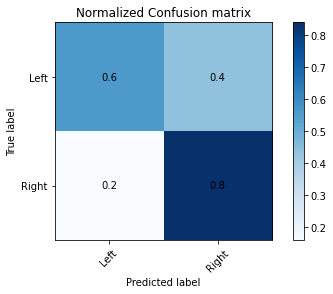

In [7]:
## XDAWN DECODE SVM REG SUBJECT 1 
n_filter = 3 # num of components fixed number 

# Create classification pipeline 

#
#SVM
clf = make_pipeline(Xdawn(n_components=n_filter),
                    Vectorizer(),
                    MinMaxScaler(),
                    LinearSVC(C=1,max_iter=10000))




# Get the labels
labelsLR = epochsLR.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

# Do cross-validation
preds = np.empty(len(labelsLR))
for train, test in cv.split(epochsLR, labelsLR):
    clf.fit(epochsLR[train], labelsLR[train])
    preds[test] = clf.predict(epochsLR[test])

# Classification report
target_names = ['Left','Right']

report = classification_report(labelsLR, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labelsLR, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')

for (i, j), z in np.ndenumerate(cm_normalized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    
plt.savefig('SUB1_LSVC_CLASS_LR.pdf')

Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance 

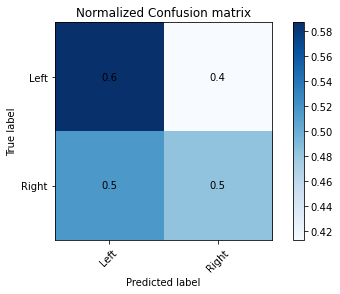

In [8]:

# Get the labels
labelsLR2 = epochsLR2.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

# Do cross-validation
preds = np.empty(len(labelsLR2))
for train, test in cv.split(epochsLR2, labelsLR2):
    clf.fit(epochsLR2[train], labelsLR2[train])
    preds[test] = clf.predict(epochsLR2[test])

# Classification report
target_names = ['Left','Right']

report = classification_report(labelsLR2, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labelsLR2, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')

for (i, j), z in np.ndenumerate(cm_normalized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    
plt.savefig('SUB2_LSVC_CLASS_LR.pdf')

Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance 

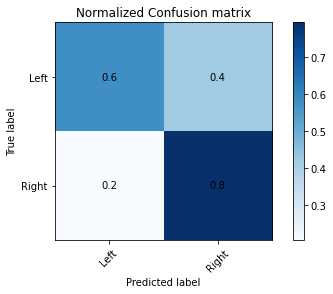

In [9]:


# Get the labels
labelsLR3 = epochsLR3.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

# Do cross-validation
preds = np.empty(len(labelsLR3))
for train, test in cv.split(epochsLR3, labelsLR3):
    clf.fit(epochsLR3[train], labelsLR3[train])
    preds[test] = clf.predict(epochsLR3[test])

# Classification report
target_names = ['Left','Right']

report = classification_report(labelsLR3, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labelsLR3, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')

for (i, j), z in np.ndenumerate(cm_normalized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    
plt.savefig('SUB3_LSVC_CLASS_LR.pdf')

Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 13 from info
Reducing data rank from 13 -> 13
Estimating covariance 

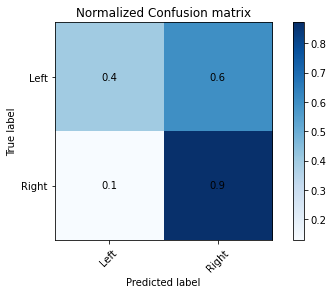

In [10]:

# Get the labels
labelsLR4 = epochsLR4.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

# Do cross-validation
preds = np.empty(len(labelsLR4))
for train, test in cv.split(epochsLR4, labelsLR4):
    clf.fit(epochsLR4[train], labelsLR4[train])
    preds[test] = clf.predict(epochsLR4[test])

# Classification report
target_names = ['Left','Right']

report = classification_report(labelsLR4, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labelsLR4, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')

for (i, j), z in np.ndenumerate(cm_normalized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    
plt.savefig('SUB4_LSVC_CLASS_LR.pdf')

## DIRECTION Spatio-temporal DECODE

In [12]:


# create classification matrix for SUB 1-4

X = epochsLR.get_data()  # EEG signals: n_epochs, n_channels, n_times
y = epochsLR.events[:,2]  # target: left vs right 

labels = epochsLR.events[:, -1]
eeg_data = epochsLR.get_data().reshape(len(labels), -1)


X2 = epochsLR2.get_data()  # EEG signals: n_epochs, n_channels, n_times
y2 = epochsLR2.events[:,2]  # target: left vs right 

labels2 = epochsLR2.events[:, -1]
eeg_data2 = epochsLR2.get_data().reshape(len(labels2), -1)


X3= epochsLR3.get_data()  # EEG signals: n_epochs, n_channels, n_times
y3 = epochsLR3.events[:,2]  # target: left vs right 

labels3 = epochsLR3.events[:, -1]
eeg_data3 = epochsLR3.get_data().reshape(len(labels3), -1)


X4 = epochsLR4.get_data()  # EEG signals: n_epochs, n_channels, n_times
y4 = epochsLR4.events[:,2]  # target: left vs right 

labels4 = epochsLR4.events[:, -1]
eeg_data4 = epochsLR4.get_data().reshape(len(labels4), -1)




In [14]:
# Uses all EEG electrodes and time points as separate classification features, 
#so the resulting filters used are spatio-temporal
clf = make_pipeline(Scaler(epochsLR.info),
                    Vectorizer(),
                    LinearSVC(C=1,max_iter=10000))

clf2 = make_pipeline(Scaler(epochsLR2.info),
                    Vectorizer(),
                    LinearSVC(C=1,max_iter=10000))

clf3 = make_pipeline(Scaler(epochsLR3.info),
                    Vectorizer(),
                    LinearSVC(C=1,max_iter=10000))

clf4 = make_pipeline(Scaler(epochsLR4.info),
                    Vectorizer(),
                    LinearSVC(C=1,max_iter=10000))

#                    LogisticRegression(solver='lbfgs'))


scores = cross_val_multiscore(clf, X, y, cv=2, n_jobs=1)

# Mean scores across cross-validation splits
score = np.mean(scores, axis=0)
print('Spatio-temporal: %0.1f%%' % (100 * score,))


scores2 = cross_val_multiscore(clf2, X2, y2, cv=2, n_jobs=1)

# Mean scores across cross-validation splits
score2 = np.mean(scores2, axis=0)
print('Spatio-temporal: %0.1f%%' % (100 * score2,))



scores3 = cross_val_multiscore(clf3, X3, y3, cv=2, n_jobs=1)

# Mean scores across cross-validation splits
score3 = np.mean(scores3, axis=0)
print('Spatio-temporal: %0.1f%%' % (100 * score3,))


scores4 = cross_val_multiscore(clf4, X4, y4, cv=2, n_jobs=1)

# Mean scores across cross-validation splits
score4 = np.mean(scores4, axis=0)
print('Spatio-temporal: %0.1f%%' % (100 * score4,))




print('Spatio-temporal: %0.1f%%' % (100 * score,))
print('Spatio-temporal: %0.1f%%' % (100 * score2,))
print('Spatio-temporal: %0.1f%%' % (100 * score3,))
print('Spatio-temporal: %0.1f%%' % (100 * score4,))



Spatio-temporal: 71.5%
Spatio-temporal: 51.5%
Spatio-temporal: 65.7%
Spatio-temporal: 67.2%
Spatio-temporal: 71.5%
Spatio-temporal: 51.5%
Spatio-temporal: 65.7%
Spatio-temporal: 67.2%


  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

No projector specified for this dataset. Please consider the method self.add_proj.


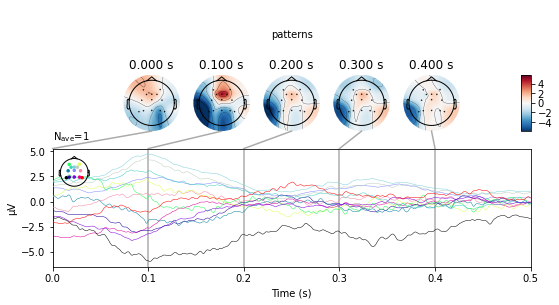

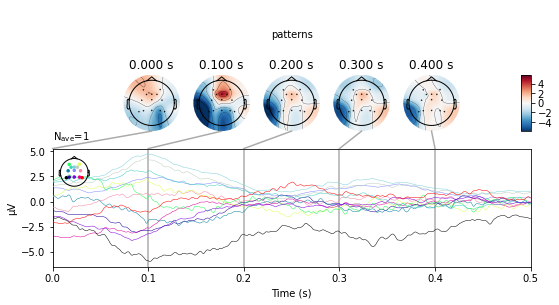

In [22]:
#You can retrieve the spatial filters and spatial patterns if you explicitly use a LinearModel
## SUB 1
clf = make_pipeline(StandardScaler(),
                    LinearModel(LinearSVC(C=1,max_iter=10000)))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
time_decod.fit(X, y)

coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochsLR.info, tmin=epochsLR.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0., .500, .100), title='patterns',
                  **joint_kwargs)



  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

No projector specified for this dataset. Please consider the method self.add_proj.


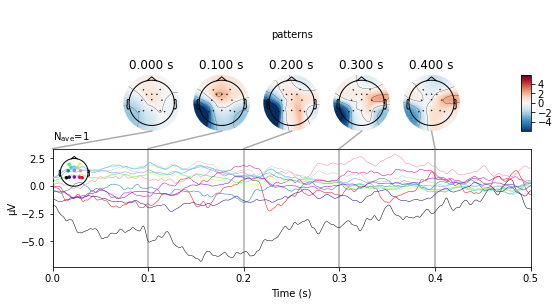

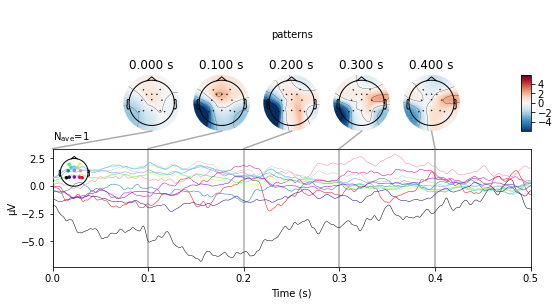

In [23]:
#You can retrieve the spatial filters and spatial patterns if you explicitly use a LinearModel
## SUB 2

clf = make_pipeline(StandardScaler(),
                    LinearModel(LinearSVC(C=1,max_iter=10000)))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
time_decod.fit(X2, y2)

coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochsLR2.info, tmin=epochsLR2.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0., .500, .100), title='patterns',
                  **joint_kwargs)


  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

No projector specified for this dataset. Please consider the method self.add_proj.


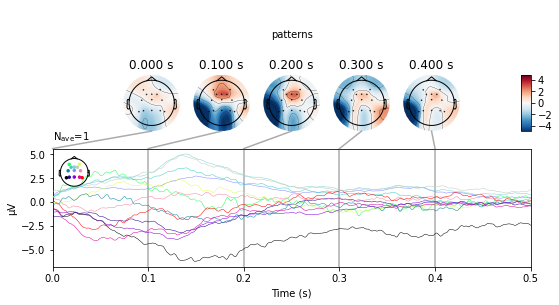

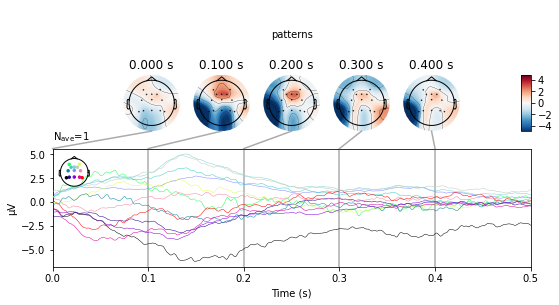

In [24]:
#You can retrieve the spatial filters and spatial patterns if you explicitly use a LinearModel
## SUB 3
clf = make_pipeline(StandardScaler(),
                    LinearModel(LinearSVC(C=1,max_iter=10000)))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
time_decod.fit(X3, y3)

coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochsLR3.info, tmin=epochsLR3.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0.0, .500, .100), title='patterns',
                  **joint_kwargs)



  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

No projector specified for this dataset. Please consider the method self.add_proj.


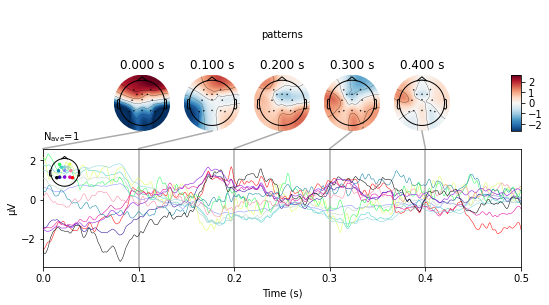

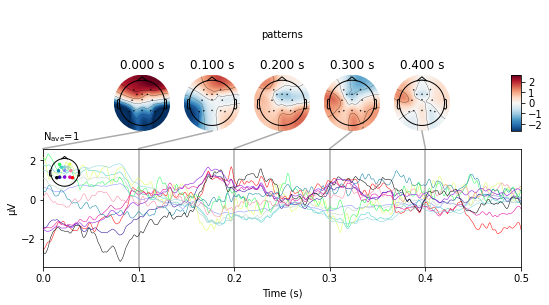

In [40]:
#You can retrieve the spatial filters and spatial patterns if you explicitly use a LinearModel
## SUB 4
clf = make_pipeline(StandardScaler(),
                    LinearModel(LinearSVC(C=1,max_iter=10000)))
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
time_decod.fit(X4, y4)

coef = get_coef(time_decod, 'patterns_', inverse_transform=True)
evoked = mne.EvokedArray(coef, epochsLR4.info, tmin=epochsLR4.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0.0, .500, .100), title='patterns',
                  **joint_kwargs)

## DIRECTION Spatial DECODE: classification of evoked responses 

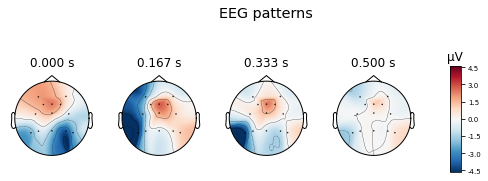

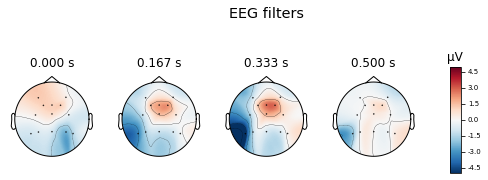

In [28]:
#subject 1

clf =LinearSVC(C=1,max_iter=10000)
scaler = StandardScaler()

# create a linear model with svc
model = LinearModel(clf)

# fit the classifier on eeg data
Xa = scaler.fit_transform(eeg_data)
model.fit(Xa, labels)

# Extract and plot spatial filters and spatial patterns
for name, coef in (('patterns', model.patterns_), ('filters', model.filters_)):
    # We fitted the linear model onto Z-scored data. To make the filters
    # interpretable, we must reverse this normalization step
    coef = scaler.inverse_transform([coef])[0]

    # The data was vectorized to fit a single model across all time points and
    # all channels. We thus reshape it:
    coef = coef.reshape(len(epochsLR.ch_names), -1)

    # Plot
    evoked = EvokedArray(coef, epochsLR.info, tmin=epochsLR.times[0])
    evoked.plot_topomap(title='EEG %s' % name, time_unit='s')

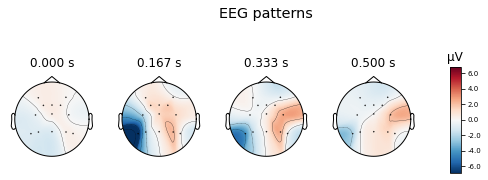

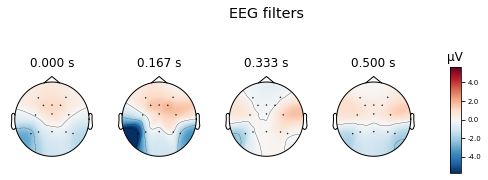

In [29]:
#subject 2

# fit the classifier on EEG data
X2a = scaler.fit_transform(eeg_data2)
model.fit(X2a, labels2)

# Extract and plot spatial filters and spatial patterns
for name, coef in (('patterns', model.patterns_), ('filters', model.filters_)):
    # We fitted the linear model onto Z-scored data. To make the filters
    # interpretable, we must reverse this normalization step
    coef = scaler.inverse_transform([coef])[0]

    # The data was vectorized to fit a single model across all time points and
    # all channels. We thus reshape it:
    coef = coef.reshape(len(epochsLR2.ch_names), -1)

    # Plot
    evoked = EvokedArray(coef, epochsLR2.info, tmin=epochsLR2.times[0])
    evoked.plot_topomap(title='EEG %s' % name, time_unit='s')

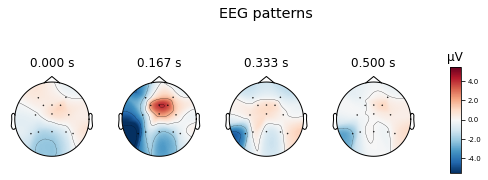

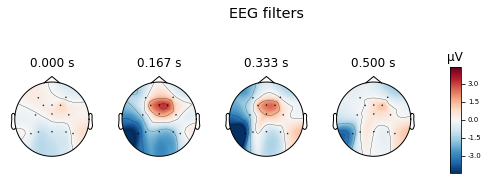

In [30]:
#subject 3

# fit the classifier on MEG data
X3a = scaler.fit_transform(eeg_data3)
model.fit(X3a, labels3)

# Extract and plot spatial filters and spatial patterns
for name, coef in (('patterns', model.patterns_), ('filters', model.filters_)):
    # We fitted the linear model onto Z-scored data. To make the filters
    # interpretable, we must reverse this normalization step
    coef = scaler.inverse_transform([coef])[0]

    # The data was vectorized to fit a single model across all time points and
    # all channels. We thus reshape it:
    coef = coef.reshape(len(epochsLR3.ch_names), -1)

    # Plot
    evoked = EvokedArray(coef, epochsLR3.info, tmin=epochsLR3.times[0])
    evoked.plot_topomap(title='EEG %s' % name, time_unit='s')

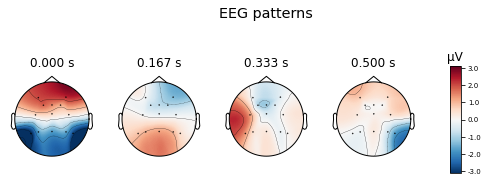

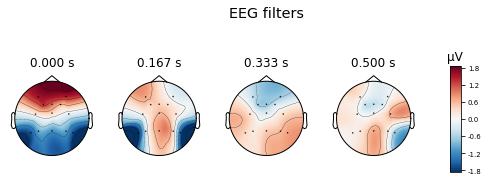

In [36]:
#subject 4

# fit the classifier on EEG data
X4a = scaler.fit_transform(eeg_data4)
model.fit(X4a, labels4)

# Extract and plot spatial filters and spatial patterns
for name, coef in (('patterns', model.patterns_), ('filters', model.filters_)):
    # We fitted the linear model onto Z-scored data. To make the filters
    # interpretable, we must reverse this normalization step
    coef = scaler.inverse_transform([coef])[0]

    # The data was vectorized to fit a single model across all time points and
    # all channels. We thus reshape it:
    coef = coef.reshape(len(epochsLR4.ch_names), -1)

    # Plot
    evoked = EvokedArray(coef, epochsLR4.info, tmin=epochsLR4.times[0])
    evoked.plot_topomap(title='EEG %s' % name, time_unit='s')

## Decoding over time

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

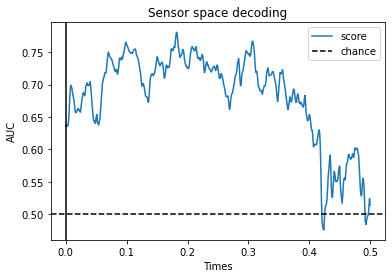

In [38]:
# SUB1
# We will train the classifier on all left vs. right trials on EEG

clf = make_pipeline(StandardScaler(),LinearSVC(C=1,max_iter=10000))

time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, X, y, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochsLR.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')

plt.savefig('SUB1_LSVC_TEMP_LR.pdf')

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

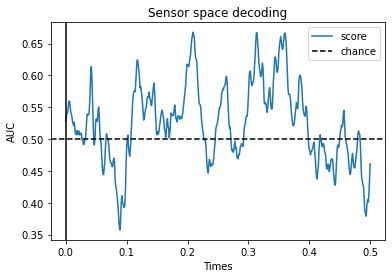

In [39]:
# SUB2
# We will train the classifi# We will train the classifier on all left vs. right trials 

scores = cross_val_multiscore(time_decod, X2, y2, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochsLR2.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.savefig('SUB2_LSVC_TEMP_LR.pdf')

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

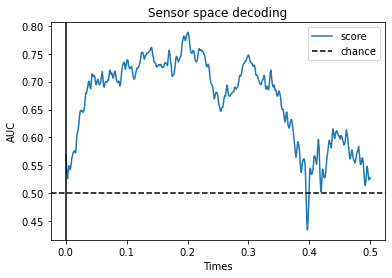

In [41]:
# SUB3
# We will train the classifier on all left vs. right trials on EEG

scores = cross_val_multiscore(time_decod, X3, y3, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochsLR3.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.savefig('SUB3_LSVC_TEMP_LR.pdf')

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

  0%|          | Fitting SlidingEstimator : 0/501 [00:00<?,       ?it/s]

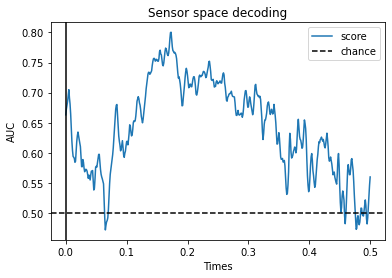

In [42]:
# SUB4
# We will train the classifier on all left vs. right trials on EEG
# here we use cv=3 just for speed
scores = cross_val_multiscore(time_decod, X4, y4, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot
fig, ax = plt.subplots()
ax.plot(epochsLR4.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.savefig('SUB4_LSVC_TEMP_LR.pdf')

In [ ]:
##overview of variables created
#variables = %who_ls
#for v in variables:
 #   print(v, type(eval(v)).__name__, str(eval(v)))